<div style="font-size:18pt; padding-top:20px; text-align:center">ДОМАШНЕЕ ЗАДАНИЕ 2: <b>Выбор модели</b></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Цель работы</span>
    <ol>
        <li>реализация собственных классов совместимых с библиотекой sklearn </li>
<li>использование полиномиальной транcформации в моделях регрессии и классификации</li>
<li>использование регуляризации в моделях регрессии и классификации</li>
<li>выбор гиперпараметров и интерпретация кривых обучения</li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [443]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [444]:
surname = "Овчинникова"  # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Задание 1: </div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

### Реализация класса, предназначенного для оценки параметров линейной регрессии с регуляризацией, совместимого с sklearn. Коэффициент регуляризации (alpha) как параметр, использование метода наименьших квадратов с регуляризацией.

In [445]:
import pandas as pnd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])

In [446]:
df = pnd.read_csv("data/Reg_A5.csv")

X = df.drop('Y', axis=1).values
y = df['Y'].values

In [447]:
df.head()

,X,Y
0,3.856603,9.209759
1,0.103760,10.409240
2,3.168241,7.643742
3,3.744019,8.453341
4,2.492535,9.317824


In [448]:
X

array([[3.85660322],
       [0.10375975],
       [3.16824117],
       [3.74401941],
       [2.49253506],
       [1.12398323],
       [0.99031432],
       [3.80265356],
       [0.84555418],
       [0.44169907],
       [3.42679909],
       [4.76696673],
       [0.01974133],
       [2.56096132],
       [4.06310481],
       [3.06263033],
       [3.60877659],
       [1.45938034],
       [4.58887061],
       [3.57287892],
       [2.71272184],
       [0.71085024],
       [1.8667038 ],
       [3.37066808],
       [2.20916587],
       [2.17006997],
       [3.08883489],
       [2.56569121],
       [3.25198591],
       [3.00519477],
       [4.02611598],
       [2.60823576],
       [4.5432444 ],
       [1.59618044],
       [0.45229675],
       [1.50350028],
       [0.56992181],
       [4.14340663],
       [0.2344816 ],
       [3.13143574],
       [2.73793078],
       [4.09643498],
       [0.9947377 ],
       [4.28425151],
       [1.7582632 ],
       [3.77323846],
       [1.47980853],
       [4.419

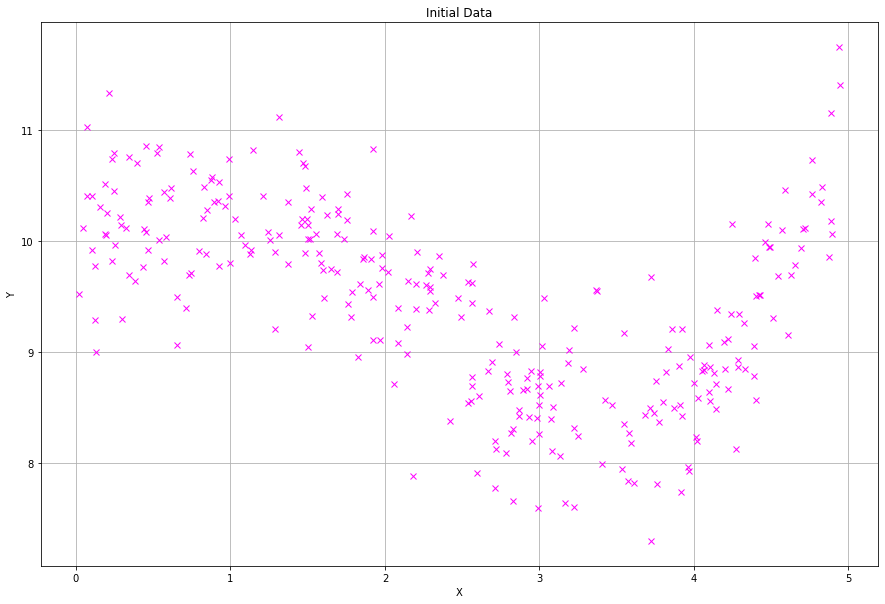

In [449]:
plt.figure(figsize = (15, 10))
plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X, y, "x", color = 'magenta')
plt.grid(True)
plt.show()

In [450]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [451]:
X_train

array([[0.61254991],
       [0.21548678],
       [4.47854474],
       [0.43484704],
       [0.12216322],
       [2.71272184],
       [0.2344816 ],
       [2.265525  ],
       [3.59301405],
       [3.91357409],
       [4.69257099],
       [4.70353519],
       [3.00525946],
       [3.68191352],
       [1.65359656],
       [1.86014451],
       [3.85660322],
       [0.73810096],
       [2.02689644],
       [2.28348768],
       [0.99031432],
       [4.72130356],
       [3.96636617],
       [3.46945033],
       [1.50105306],
       [0.1534242 ],
       [4.14340663],
       [1.31107831],
       [2.56569121],
       [0.92017411],
       [0.10582596],
       [3.07868438],
       [2.95100681],
       [0.10375975],
       [3.13780926],
       [2.53800454],
       [2.28924756],
       [2.29362115],
       [4.39233089],
       [2.8077868 ],
       [1.5153128 ],
       [2.53489315],
       [1.47980853],
       [2.0173492 ],
       [1.06593283],
       [4.01387968],
       [4.24254591],
       [3.168

In [452]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.model_selection import train_test_split

class CustomLinearRegression(RegressorMixin, BaseEstimator):
    
# Использовать метод наименьших квадратов с регуляризацией
    def __init__(self, alpha, method = 'ols'):
        self.alpha = alpha
        self.method = method
    
    def fit(self, X, y, alpha = 0):
        
        X, y = check_X_y(X, y)
        
# матрица X размером n на p
        X_ = np.c_[np.ones(X.size), X]
        
        # n = X_.shape[0]
        # p = X_.shape[1]
        
        A = np.identity(X_.shape[1])
        
# По условию: 𝐴 – единичная матрица размера 𝑝+1 на 𝑝+1, в которой элемент 𝑎[0,0]=0
        A[0,0] = 0
        
# 𝑋 – матрица признаков размера 𝑛 на 𝑝+1 (дополнительный первый столбец – это столбец единиц)
        # column = np.ones(n)
        # X_ = np.insert(X_, 0, column, axis=1)
        
        try:
            self.coef_ = np.linalg.pinv(X_.T @ X_ + alpha * A) @ X_.T @ y
            print("coef", self.coef_.size)
            
        except:
            raise ValueError
        return self
    
    def fit_transform(self, X, y=None):
        
        return self.fit(X).transform(X)
        
    def predict(self, X):
        check_is_fitted(self, 'coef_')
        X = check_array(X)
        
        X_ = np.c_[np.ones(X.size), X]
        
        return X_ @ self.coef_

In [453]:
# X_train = X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)

In [454]:
X_train.shape

(210, 1)

In [455]:
X_test.shape

(90, 1)

In [456]:
C = CustomLinearRegression(alpha = 0.5)

C.fit(X_train, y_train, alpha = 0.5)
C.coef_

coef 2


array([10.15352775, -0.30039683])

In [457]:
y_pred = C.predict(X_test)
y_pred

array([ 9.48990132,  9.61704641,  9.91442128,  9.96978113,  9.97820187,
        8.88527367,  9.77596778,  9.78993362,  9.27628508,  9.67117751,
        9.87585962,  8.86655218,  9.84419372,  9.57658282,  9.38570046,
        9.22565154,  8.8914896 ,  8.85348143,  9.64483706,  9.64622562,
        8.92024006,  9.68748654,  9.7801157 , 10.09452715,  9.03475371,
       10.09350965, 10.13120822,  9.56261848,  9.61916333,  9.81291778,
        8.82586917,  9.90389475,  9.50164561, 10.1315464 ,  8.94658083,
       10.06847308,  9.00216659,  9.67548704,  8.96048813,  8.8319091 ,
       10.08048925,  9.90108507,  8.70576444,  9.28517599,  9.07836112,
       10.01318178,  8.68473855,  9.27333202,  9.98232504,  9.12412816,
        9.93308331,  9.38400997,  8.80582749,  9.60475535,  9.33725187,
        9.71219741,  9.50955605,  9.24395984,  9.24758652,  8.67012994,
        9.70188103,  9.33883875,  8.80470947,  9.08024625,  8.87869757,
       10.05124672, 10.05702367,  8.79748875,  9.81588675,  9.74

## Реализация класса для стандартизации признаков в виде трансформации совместимый с sklearn. Передаваемые параметры: 1) has_bias (содержит ли матрица вектор единиц), 2) apply_mean (производить ли центровку)

### Transformer is an architecture for transforming one sequence into another one with the help of two parts (Encoder and Decoder)

In [458]:
class CustomStandardTransformer():
    
    def __init__(self, apply_mean, has_bias):
        self.apply_mean = apply_mean
        self.has_bias = has_bias
        # pass
        
# Performing the operation based upon the training data that yields the model parameters.
    def fit(self, X, y = None):
        X = check_array(X)
        return self
    
    # def fit_transform():
    # pass
    
    def fit_transform(self, X, y=None):
        
        return self.fit(X).transform(X)
    
# Transformer method for this transformer: applying passed mean and adding bias if not passed before
    def transform(self, X, y=None):
        
        if self.apply_mean:
            mean_p = X.mean(axis = 0)
            X = X - mean_p
            
        if not self.has_bias:
            X = np.c_[np.ones(X.size), X]
            
        return X

## Используя класс Pipeline, обучаем линейную регрессию для набора данных с коэффициентом регуляризации, равным 0.01.

### Defining the steps in the pipeline, orchestrating the flow

In [459]:
from sklearn.pipeline import Pipeline

In [460]:
pipeline = Pipeline([
    ("standartizer", CustomStandardTransformer(apply_mean=True, has_bias=True)),
    ("regressor", CustomLinearRegression(alpha = 0.01))])
pipeline.fit(X_train, y_train, regressor__alpha=0.01)

coef 2


Pipeline(steps=[('standartizer',
                 <__main__.CustomStandardTransformer object at 0x0000011B15EED250>),
                ('regressor', CustomLinearRegression(alpha=0.01))])

In [461]:
# Predicting through pipeline's regressor
y_pred = pipeline.predict(X_test)
y_pred

array([ 9.45154139,  9.57884515,  9.87659114,  9.93202007,  9.94045132,
        8.84615918,  9.73796485,  9.75194812,  9.23765857,  9.6330438 ,
        9.83798135,  8.82741433,  9.80627594,  9.53833106,  9.34721049,
        9.18696183,  8.85238287,  8.81432727,  9.60667048,  9.60806078,
        8.88116922,  9.64937318,  9.74211795, 10.05692177,  8.99582577,
       10.055903  , 10.09364862,  9.52434929,  9.58096471,  9.77496096,
        8.78668055,  9.86605147,  9.46330033, 10.09398721,  8.90754285,
       10.03083519,  8.96319798,  9.63735871,  8.92146751,  8.79272802,
       10.04286635,  9.86323828,  8.66642594,  9.24656057,  9.0394876 ,
        9.97547488,  8.64537381,  9.23470182,  9.94457964,  9.08531176,
        9.89527646,  9.34551789,  8.76661386,  9.56653875,  9.29870144,
        9.67411489,  9.47122065,  9.20529299,  9.20892419,  8.63074696,
        9.66378564,  9.3002903 ,  8.76549444,  9.04137508,  8.83957487,
       10.01358733, 10.01937149,  8.75826472,  9.77793363,  9.70

## Реализуйте функции для расчета MSE и R^2 при отложенной выборке (run_holdout) и кросс-валидации (run_cross_val). Для кросс-валидации используйте только класс KFold. Выходными значениями должны быть MSE и R^2 для обучающей и тестовой частей.

In [462]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse, r2_score as r2s

In [463]:
# The hold-out method for training a machine learning model is the process of splitting the data into different splits
# and using one split for training the model and other splits for validating and testing the models. 
#The hold-out method is used for both model evaluation and model selection.

In [464]:
def run_holdout(model_name, X, y, train_size, random_state, custom_flag) -> dict:
    
    # splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

    # training on one split
    
    if custom_flag == 0:
        model_name.fit(X_train, y_train)
    else:
        model_name.fit(X_train, y_train, regressor__alpha=0.01)
        
    y_pred_train = model_name.predict(X_train)
    y_pred_test = model_name.predict(X_test)
    
    metrics = []
    mse_hold_train = mse(y_train, y_pred_train)
    # metrics.append(mse_hold_train)
    
    mse_hold_test = mse(y_test, y_pred_test)
    # metrics.append(mse_hold_test)
    
    r2_hold_train = r2s(y_train, y_pred_train)
    # metrics.append(r2_hold_train)
    
    r2_hold_test = r2s(y_test, y_pred_test)
    # metrics.append(r2_hold_test)
    
    metrics = {'mse trained': mse_hold_train, 
               'mse tested': mse_hold_test,
               'r2 trained': r2_hold_train, 
               'r2 tested': r2_hold_test            
              } 
    
    return metrics

In [465]:
# Cross-validation is a resampling method that uses different portions of the data to test and train a model 
# on different iterations. It is mainly used in settings where the goal is prediction, 
# and one wants to estimate how accurately a predictive model will perform in practice.

In [466]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse, r2_score as r2s
import pandas as pd

def run_cross_val(model_name, X, y, n_splits, shuffle, random_state, custom_flag) -> dict:

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=random_state)
    
    # Dividing the data with KFold
    kf = KFold(n_splits = n_splits, shuffle = shuffle, random_state = random_state)
    blocks = kf.split(X_train, y_train)
    
    mse_train = []
    mse_test = []
    r2_train = []
    r2_test = []
    metrics_n = []
        
    # Separating features and target variables
    for train_index, test_index in blocks:
        
        if custom_flag == 0:
            model_name.fit(X_train[train_index], y_train[train_index])
        else:
            model_name.fit(X_train[train_index], y_train[train_index], regressor__alpha=0.01)
        
    # Training the model on separated features
        y_pred_train = model_name.predict(X_train)
        y_pred_test = model_name.predict(X_test) 
        
        mse_train.append(mse(y_train, y_pred_train))
        mse_test.append(mse(y_test, y_pred_test))
        r2_train.append(r2s(y_train, y_pred_train))
        r2_test.append(r2s(y_test, y_pred_test))
    
    
    # metrics_n.append(np.mean(mse_train))
    # metrics_n.append(np.mean(mse_test))
    # metrics_n.append(np.mean(r2_train))
    # metrics_n.append(np.mean(r2_test))
    
    # metrics = pd.DataFrame({
    #        'metrics': ['mse trained', 'mse tested', 'r2 trained', 'r2 tested'],
    #        'means': [np.mean(mse_train), np.mean(mse_test), np.mean(r2_train), np.mean(r2_test)]
    # })
    metrics = {'mse trained': np.mean(mse_train), 
               'mse tested': np.mean(mse_test),
               'r2 trained': np.mean(r2_train), 
               'r2 tested': np.mean(r2_test)             
              } 
    return metrics

In [467]:
run_holdout(pipeline, X, y, train_size=0.75, random_state = 0, custom_flag = 1)

coef 2


{'mse trained': 0.5246791769800708,
 'mse tested': 0.6628343974372327,
 'r2 trained': 0.2631672557692607,
 'r2 tested': 0.11599357781438557}

In [468]:
run_cross_val(pipeline, X, y, n_splits = 4, shuffle = True, random_state = 0, custom_flag = 1)

coef 2
coef 2
coef 2
coef 2


{'mse trained': 0.5257066149797427,
 'mse tested': 0.6641420624742496,
 'r2 trained': 0.2617243741112111,
 'r2 tested': 0.11424957615234144}

# Задание 2. Регрессия и кросс-валидация

⚠️ Замечание:

    Используйте ранее реализованные классы и функции
    Разбейте исходные данные на обучающее и тестовое подмножества в соотношении 70 на 30, random_state=0
    Для выбора гиперпараметров используйте два подхода: 1) с отложенной выборкой, 2) с кросс-валидацией
    Параметры разбиения для выбора гиперпараметров используйте те, что в п.4 задания 1

Дано множество наблюдений (см. набор данных к заданию), модель - линейная регрессия (без регуляризации). Найти степень полинома с минимальной ошибкой на проверочном подмножестве, определить среднеквадратическую ошибку на тестовом подмножестве (степень полинома от 1 до 25). Сделать заключение о влиянии степени полинома регуляризации.

Построить:

    диаграмму разброса исходных данных
    график зависимости среднеквадратической ошибки (MSE) от степени полинома для обучающего и проверочного подмножеств
    график зависимости коэффициента детерминации (R^2) от степени полинома для обучающего и проверочного подмножеств
    функцию регрессии (наилучший случай) + исходные данные


In [469]:
new_df = pnd.read_csv("data/Reg_A5.csv")

In [470]:
X = df.drop('Y', axis=1).values
y = df['Y'].values

In [471]:
X

array([[3.85660322],
       [0.10375975],
       [3.16824117],
       [3.74401941],
       [2.49253506],
       [1.12398323],
       [0.99031432],
       [3.80265356],
       [0.84555418],
       [0.44169907],
       [3.42679909],
       [4.76696673],
       [0.01974133],
       [2.56096132],
       [4.06310481],
       [3.06263033],
       [3.60877659],
       [1.45938034],
       [4.58887061],
       [3.57287892],
       [2.71272184],
       [0.71085024],
       [1.8667038 ],
       [3.37066808],
       [2.20916587],
       [2.17006997],
       [3.08883489],
       [2.56569121],
       [3.25198591],
       [3.00519477],
       [4.02611598],
       [2.60823576],
       [4.5432444 ],
       [1.59618044],
       [0.45229675],
       [1.50350028],
       [0.56992181],
       [4.14340663],
       [0.2344816 ],
       [3.13143574],
       [2.73793078],
       [4.09643498],
       [0.9947377 ],
       [4.28425151],
       [1.7582632 ],
       [3.77323846],
       [1.47980853],
       [4.419

In [472]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [473]:
max_degree = 25

hold_metrics_mse_train = []
hold_metrics_mse_test = []
hold_metrics_r2_train = []
hold_metrics_r2_test = []
    
cv_metrics_mse_train = []
cv_metrics_mse_test = []
cv_metrics_r2_train = []
cv_metrics_r2_test = []

deg_range = range(1, max_degree + 1)
for deg in deg_range:
    
    pf = PolynomialFeatures(degree = deg)
    features = pf.fit_transform(X)
    lr = LinearRegression(fit_intercept = False)

    hold_metrics = run_holdout(lr, features, y, train_size=0.75, random_state=0, custom_flag = 0)
    cv_metrics = run_cross_val(lr, features, y, n_splits=4, shuffle=True, random_state=0, custom_flag = 0)
    
    hold_metrics_mse_train.append(hold_metrics['mse trained'])
    hold_metrics_mse_test.append(hold_metrics['mse tested'])
    hold_metrics_r2_train.append(hold_metrics['r2 trained'])
    hold_metrics_r2_test.append(hold_metrics['r2 tested'])
    
    cv_metrics_mse_train.append(cv_metrics['mse trained'])
    cv_metrics_mse_test.append(cv_metrics['mse tested'])
    cv_metrics_r2_train.append(cv_metrics['r2 trained'])
    cv_metrics_r2_test.append(cv_metrics['r2 tested'])

best_mse_hold = np.argmin(hold_metrics_mse_test)
best_mse_cv = np.argmin(cv_metrics_mse_test)
best_r2_hold = np.argmax(hold_metrics_r2_test)
best_r2_cv = np.argmax(cv_metrics_r2_test)
# cv_metrics_mse_test

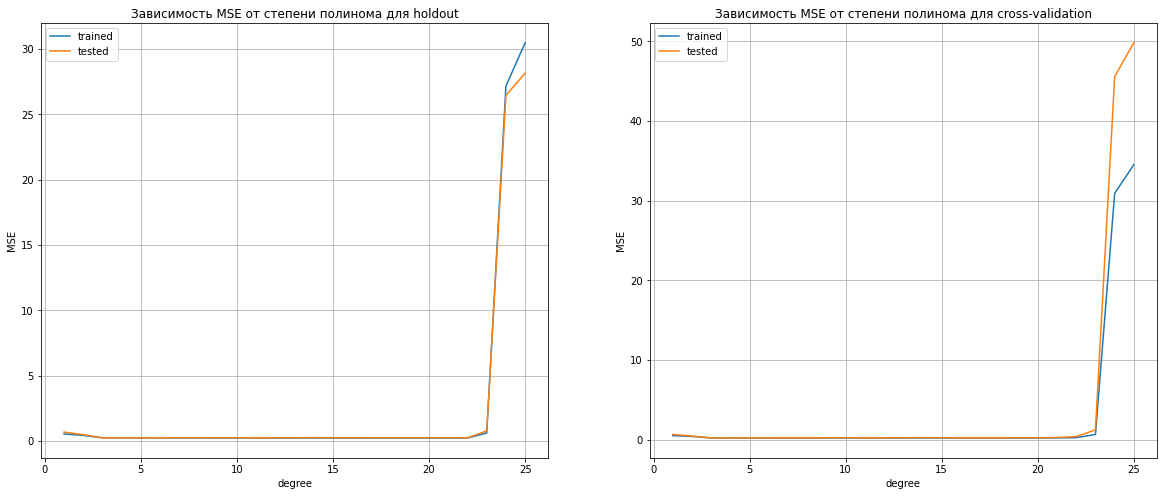

In [474]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

ax[0].plot(deg_range, hold_metrics_mse_train, label = 'trained')
ax[0].plot(deg_range,  hold_metrics_mse_test, label='tested')
ax[0].set_title('Зависимость MSE от степени полинома для holdout')
ax[0].set_xlabel('degree')
ax[0].set_ylabel('MSE')
ax[0].grid()
ax[0].legend()

ax[1].plot(deg_range, cv_metrics_mse_train, label = 'trained')
ax[1].plot(deg_range,  cv_metrics_mse_test, label='tested')
ax[1].set_title('Зависимость MSE от степени полинома для cross-validation')
ax[1].set_xlabel('degree')
ax[1].set_ylabel('MSE')
ax[1].grid()
ax[1].legend()

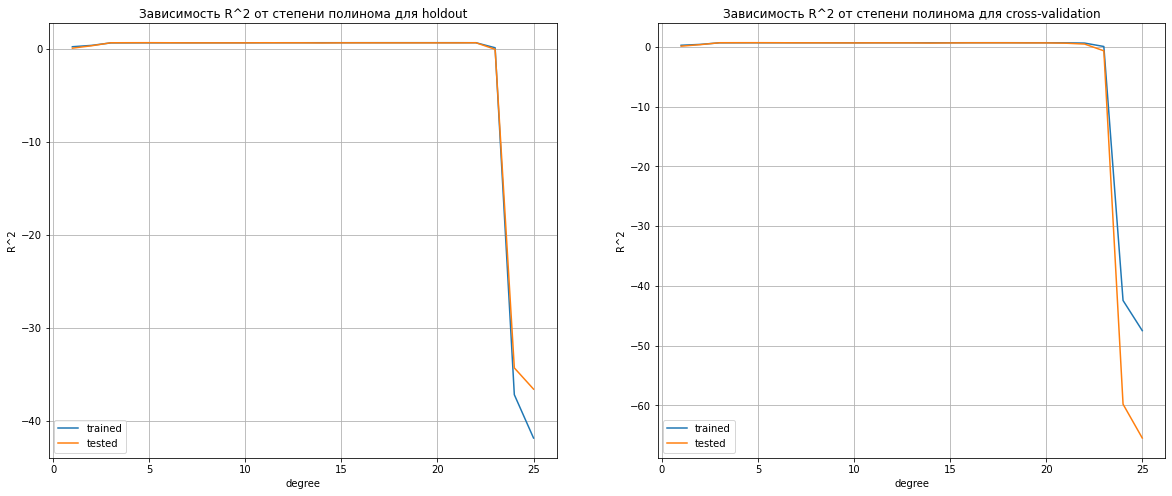

In [475]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

ax[0].plot(deg_range, hold_metrics_r2_train, label = 'trained')
ax[0].plot(deg_range,  hold_metrics_r2_test, label='tested')
ax[0].set_title('Зависимость R^2 от степени полинома для holdout')
ax[0].set_xlabel('degree')
ax[0].set_ylabel('R^2')
ax[0].grid()
ax[0].legend()

ax[1].plot(deg_range, cv_metrics_r2_train, label = 'trained')
ax[1].plot(deg_range,  cv_metrics_r2_test, label='tested')
ax[1].set_title('Зависимость R^2 от степени полинома для cross-validation')
ax[1].set_xlabel('degree')
ax[1].set_ylabel('R^2')
ax[1].grid()
ax[1].legend()

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# Can't implement custom linear model, fixing not iterable LR
X_poly_train = PolynomialFeatures(degree = best_mse_hold + 1).fit_transform(X_train)
X_poly_test = PolynomialFeatures(degree = best_mse_hold + 1).fit_transform(X_test)
# poly_transf = PolynomialFeatures(degree = best_mse_hold + 1).fit_transform(X_train)
# transformer =  CustomStandardTransformer(apply_mean = False, has_bias=True).fit_transform(X_train)
lrn = LinearRegression(fit_intercept=True)

lrn.fit(X_poly_train, y_train)
y_pred = lrn.predict(X_poly_test)

In [477]:
f_x_d = np.linspace(X_poly_test.min(), X_poly_test.max(), 100)

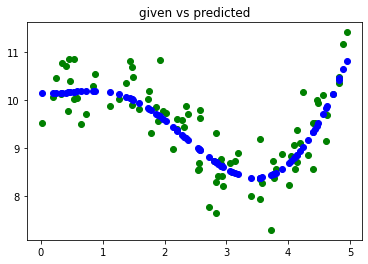

In [478]:
plt.title("given vs predicted")
plt.scatter(X_test, y_test, color="green", label='started')
plt.scatter(X_test, y_pred, color="blue", label='prediction')
# plt.plot(f_x_d, y_pred, color="red", lw=5, label='prediction')
plt.show()

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# Can't implement custom linear model, fixing not iterable LR
X_poly_train = PolynomialFeatures(degree = best_mse_cv + 1).fit_transform(X_train)
X_poly_test = PolynomialFeatures(degree = best_mse_cv + 1).fit_transform(X_test)
lrn = LinearRegression(fit_intercept=True)

lrn.fit(X_poly_train, y_train)
y_pred = lrn.predict(X_poly_test)

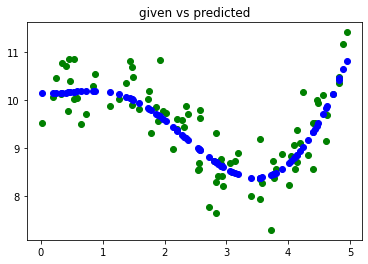

In [480]:
plt.title("given vs predicted")
plt.scatter(X_test, y_test, color="green", label='started')
plt.scatter(X_test, y_pred, color="blue", label='prediction')
# plt.plot(f_x_d, y_pred, color="red", lw=5, label='prediction')
plt.show()

## Заключение:

С возрастанием степени полинома возрастает вероятность переобучения. На высоких степенях полином нестабилен

## Задание 3
! Замечание:

    Используйте класс логистической регрессии из sklearn со следующими параметрами:
        penalty='l2'
        fit_intercept=True
        max_iter=100
        C=1e5
        solver='liblinear'
        random_state=12345
    Разбейте исходные данные на обучающее и тестовое подмножества в соотношении 70 на 30, random_state=0
    Для выбора гиперпараметров используйте два подхода: 1) с отложенной выборкой, 2) с кросс-валидацией
    Для кросс-валидации можно использовать функцию cross_validate из sklearn
    Параметры разбиения для выбора гиперпараметров используйте те, что в п.4 задания 1

Дано множество наблюдений (см. набор данных к заданию), классификатор - логистическая регрессия. Найти степень полинома с минимальной ошибкой на проверочном подмножестве, определить долю правильных классификаций на тестовом подмножестве. Сделать заключение о влиянии степени полинома регуляризации.

Построить:

    диаграмму разброса исходных данных
    график зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств
    график зависимости доли правильных классификаций от количества итераций для обучающего и проверочного подмножеств для наилучшего случая
    результат классификации для наилучшего случая (степень полинома) для обучающего и тестового подмножеств


In [481]:
import requests
url = 'https://raw.githubusercontent.com/MLMethods/Assignments/master/data/A2_Model_Selection/Cl_A5_V2.csv'
res = requests.get(url, allow_redirects=True)
with open('dfv2.csv','wb') as file:
    file.write(res.content)
dfv2 = pd.read_csv('dfv2.csv')
dfv2

,X1,X2,Y
0,5.712051,4.420663,0
1,4.658783,6.312037,1
2,4.211528,4.934160,0
3,5.440266,5.688972,0
4,5.109973,7.006561,1
...,...,...,...
495,4.782801,5.331527,0
496,3.469108,5.801888,1
497,6.357797,4.195166,1
498,5.261725,4.757229,0


### Initial data

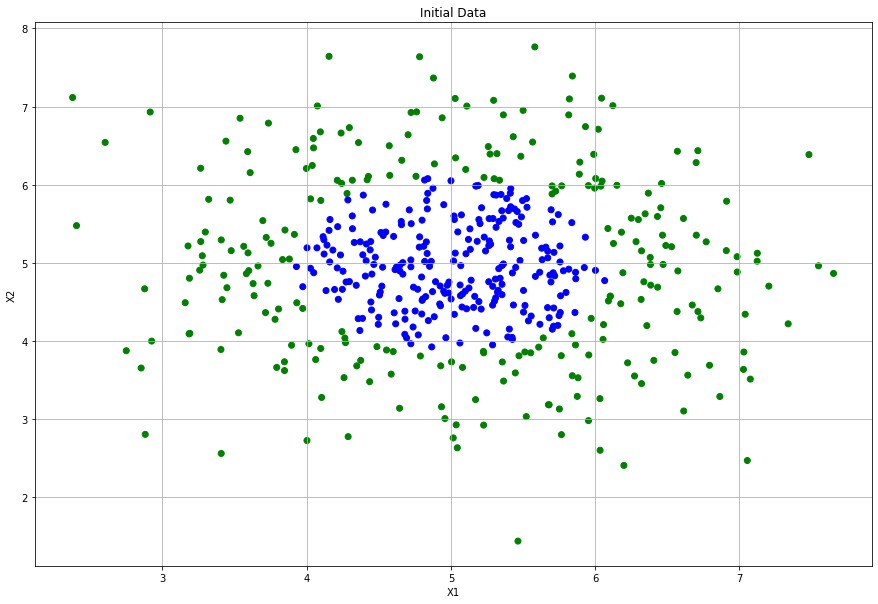

In [482]:
x1 = dfv2.X1.values
x2 = dfv2.X2.values
y = dfv2.Y.values

plt.figure(figsize = (15, 10))
plt.xlabel("X1")
plt.title("Initial Data")
plt.ylabel("X2")
plt.scatter(dfv2.X1, dfv2.X2, c = dfv2.Y, cmap = clrMap)
plt.grid(True)
plt.show()

In [483]:
X = dfv2.drop('Y', axis=1).values

In [484]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [485]:
# Splitting data to training, evaluating and testing

X_train_init, X_test, y_train_init, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# Splitting the data to evaluating, train_size from exercise 1 // holdout

x_train, x_val, y_train, y_val = train_test_split(X_train_init, y_train_init, train_size=0.75, random_state=0)

In [486]:
# logistic regression with parameters

logr = LogisticRegression(penalty='l2',
                            fit_intercept = True,
                            max_iter = 100,
                            C = 1e5,
                            solver = 'liblinear',
                            random_state = 12345) 

In [487]:
max_deg = 25
degree_range = range(1, max_deg + 1)
degree = 0
accr = 0
mse_ch = 100
mse_data = []
accuracy_data = []
accuracy_data_tr = []

for deg in degree_range:
    
    pf = PolynomialFeatures(degree = deg)
    
    x_train_holdout = pf.fit_transform(x_train)
    
    x_test_holdout = pf.fit_transform(x_val)
    
    x_test_pf = pf.fit_transform(X_test)
    
    # using holdout for initial data
    # hold_metrics = run_holdout(logr, x_train_holdout, y_train, train_size=0.75, random_state=0, custom_flag = 0)
    
    # using cross-validation for initial data 
    # cv_metrics = run_cross_val(logr, X_train_init, y_train_init, n_splits=4, shuffle=True, random_state=0, custom_flag = 0)
    
    logr.fit(x_train_holdout, y_train)
    
    # holdout with tested/initial data
    y_pred_test_holdout = logr.predict(x_test_holdout)
    
    # holdout with training data    
    y_pred_train_holdout = logr.predict(x_train_holdout)   
    y_pred_test_pf = logr.predict(x_test_pf)
        
    # calculating mse for each step

    mse_data.append(mse(y_pred_test_holdout, y_val))
    
    # calculating accuracy for the plot, evaluated data
    
    accuracy_data.append(accuracy_score(y_pred_test_holdout, y_val))
    
    # calculating accuracy for the plot, training data
    accuracy_data_tr.append(accuracy_score(y_train, y_pred_train_holdout))    
    
    # mse_ch is a chosen mse value. at each step we compare the chosen before with the newest one and see which one is smaller
    if mse(y_pred_test_holdout, y_val) < mse_ch:
        mse_ch = mse(y_pred_test_holdout, y_val)
        degree = deg
    # accr is a chosen accuracy value    
    if accr < accuracy_score(y_pred_test_holdout, y_val):
        accr = accuracy_score(y_pred_test_holdout, y_val)
        
    # adding!! accuracy with holdout
    hd_accrs = []
    hd_accrs.append(accuracy_score(y_pred_test_pf, y_test))
    hd_accr = 0
    
    if hd_accr < accuracy_score(y_pred_test_pf, y_test):
        hd_accr = accuracy_score(y_pred_test_pf, y_test)

In [488]:
# 
accr, mse_ch, hd_accr, degree

(1.0, 0.0, 0.84, 2)

In [489]:
# y_pred_test_holdout

In [490]:
# y_val

In [491]:
# LogisticRegression?

In [492]:
# accuracy_score?

In [493]:
# LogisticRegression().score

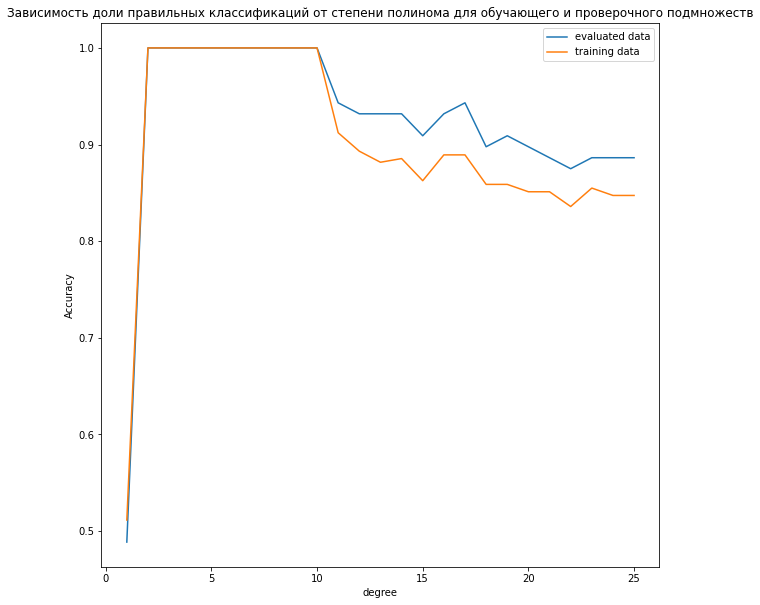

In [494]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(range(1, max_deg + 1), accuracy_data, label='evaluated data')
ax.plot(range(1, max_deg + 1), accuracy_data_tr, label='training data')
ax.set_title('Зависимость доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств')
ax.set_xlabel('degree')
ax.set_ylabel('Accuracy')
ax.legend()

In [495]:
pf = PolynomialFeatures(degree = degree)
X_train_holdout = pf.fit_transform(x_train)   
X_test_holdout = pf.fit_transform(x_val)
X_test_pf = pf.fit_transform(X_test)

In [496]:
accuracy_data_it = []
accuracy_data_tr_it = []

In [497]:
iterations = 500
for i in range(1, iterations):
    
    pf = PolynomialFeatures(degree = degree)
    
    # logistic regression with more iterations

    logr_i = LogisticRegression(penalty='l2',
                            fit_intercept = True,
                            max_iter = i,
                            C = 1e5,
                            solver = 'liblinear',
                            random_state = 12345)
    
    
    logr_i.fit(X_train_holdout, y_train)
    
    # holdout with tested/initial data
    y_pred_test_holdout = logr_i.predict(X_test_holdout)
    
    # holdout with training data    
    y_pred_train_holdout = logr_i.predict(X_train_holdout)   
    y_pred_test_pf = logr_i.predict(X_test_pf)
    
    # calculating accuracy for the plot, evaluated data
    
    accuracy_data_it.append(accuracy_score(y_pred_test_holdout, y_val))
    
    # calculating accuracy for the plot, training data
    accuracy_data_tr_it.append(accuracy_score(y_train, y_pred_train_holdout))

C:\Users\blueb\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

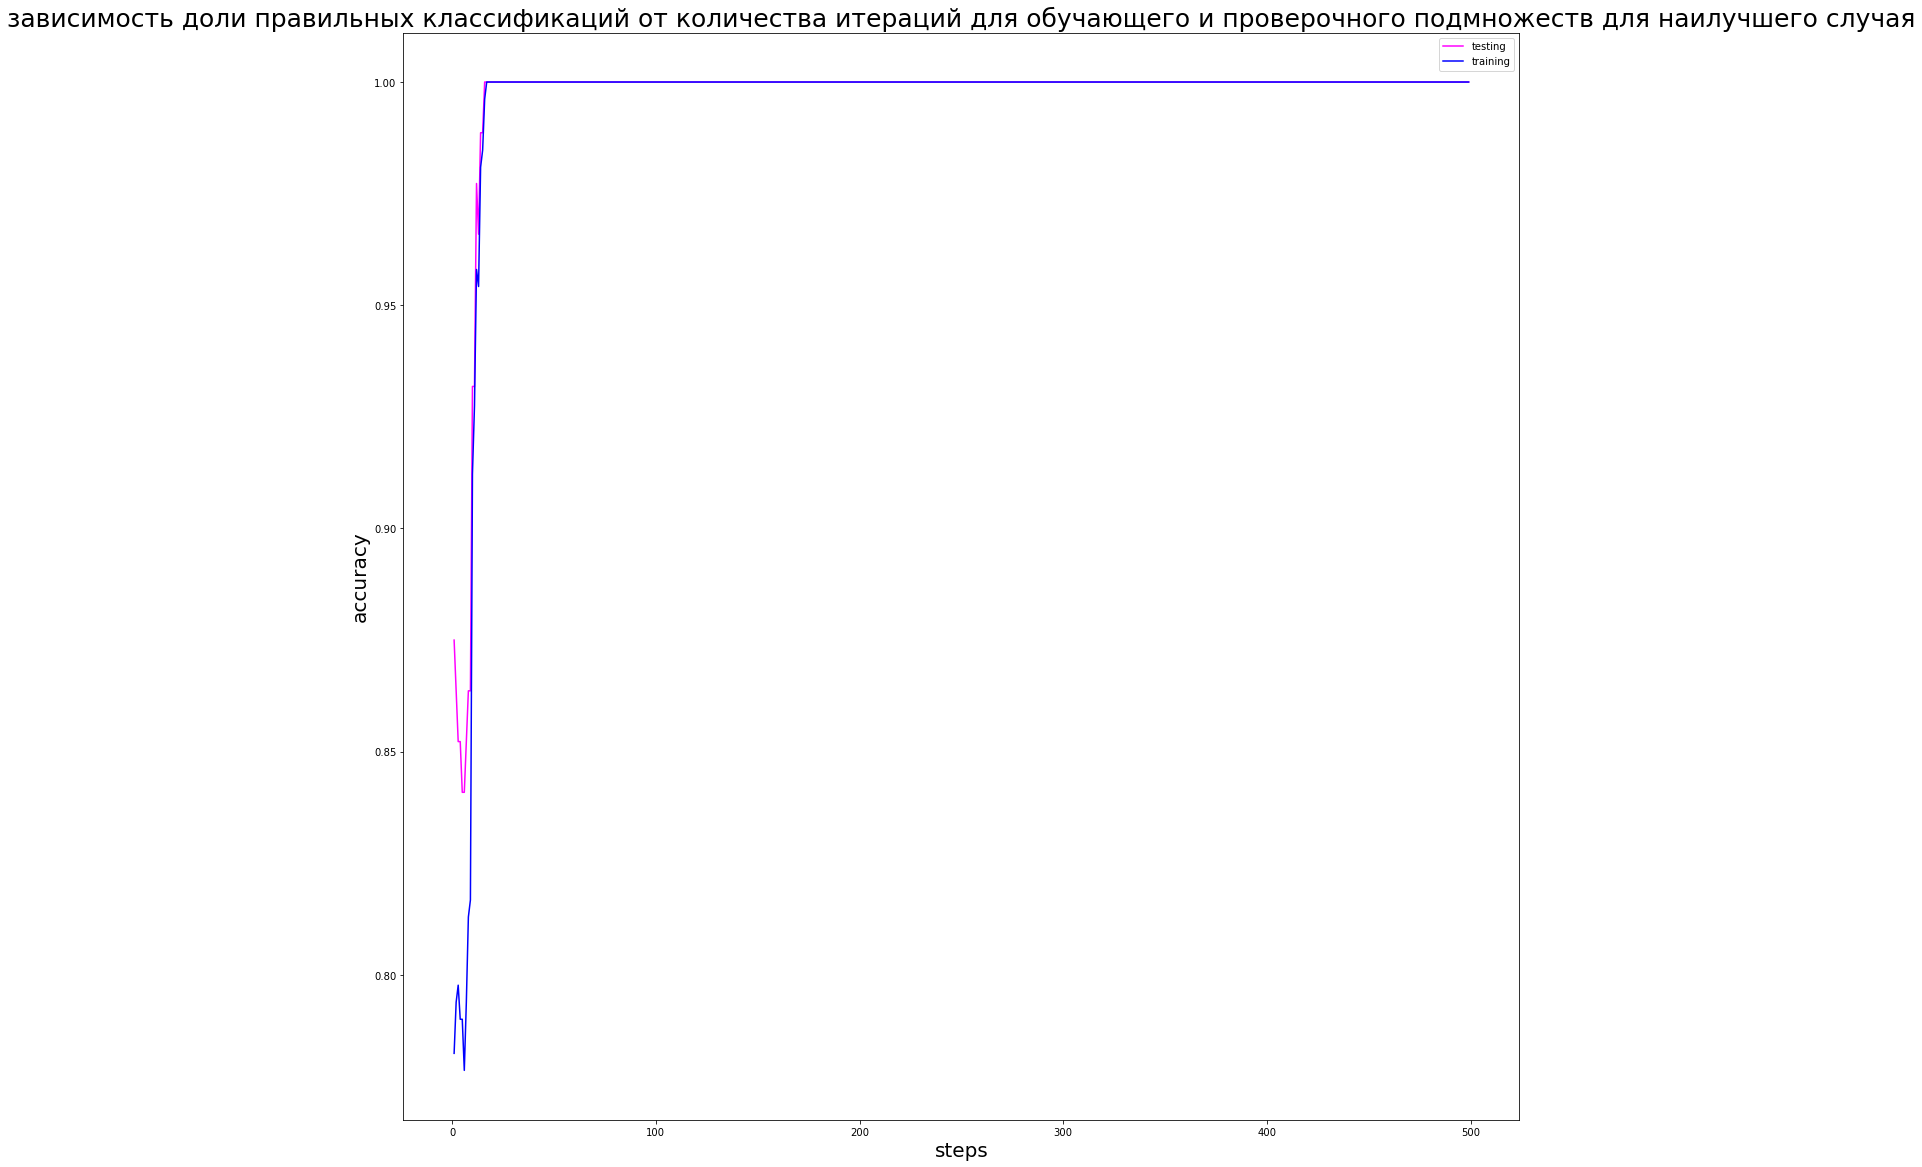

In [498]:
fig,ax = plt.subplots(1, 1, figsize=(20, 20))
ax.plot(range(1, iterations), accuracy_data_it, color = 'magenta', label = 'testing')
ax.plot(range(1, iterations), accuracy_data_tr_it, color = 'blue', label = 'training')
ax.set_xlabel('steps', fontsize=20)
ax.set_ylabel('accuracy', fontsize=20)
ax.set_title('зависимость доли правильных классификаций от количества итераций для обучающего и проверочного подмножеств для наилучшего случая', fontsize=25)
ax.legend()

### Cross-validation

In [499]:
from sklearn.model_selection import cross_validate
import sklearn.metrics as skm

In [500]:
# Splitting data to training, evaluating and testing

X_train_init, X_test, y_train_init, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# Splitting the data to evaluating, train_size from exercise 1 // holdout

x_train, x_val, y_train, y_val = train_test_split(X_train_init, y_train_init, train_size=0.75, random_state=0)

In [501]:
skm.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [502]:
max_deg = 25
kf = KFold(n_splits = 4, shuffle=True, random_state=0)
degree_range = range(1, max_deg + 1)
degree = 0
accr = 0
mse_ch = 100
mse_data = []
accuracy_data = []
accuracy_data_tr = []

for deg in degree_range:
    
    pf = PolynomialFeatures(degree = deg)
    
    Xx_train_holdout = pf.fit_transform(x_train)
    
    Xx_test_holdout = pf.fit_transform(x_val)
    
    Xx_test_pf = pf.fit_transform(X_test)
    
 
    # using cross-validation for initial data 
    cv_sc = cross_validate(logr, Xx_train_holdout, y_train, cv = kf, 
                             scoring=['neg_mean_squared_error', 'accuracy'], 
                             return_train_score=True)
    
    mse_data.append(abs(cv_sc["test_neg_mean_squared_error"]).mean())
    
    if mse_ch > abs(cv_sc["test_neg_mean_squared_error"]).mean():
        mse_ch = abs(cv_sc["test_neg_mean_squared_error"]).mean()
        degree = deg
    
    accuracy_data.append(cv_sc["test_accuracy"].mean())
    
    if accr < cv_sc["test_accuracy"].mean():
        accr = cv_sc["test_accuracy"].mean()
    
    accuracy_data_tr.append(cv_sc["train_accuracy"].mean())

In [503]:
# mse_data, 

mse_ch, degree, accr

(0.007634032634032634, 2, 0.9923659673659674)

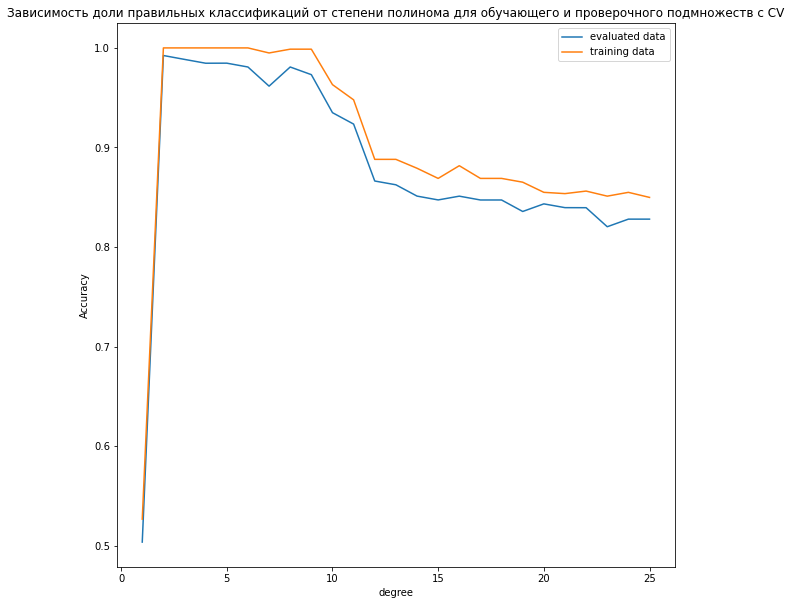

In [504]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(range(1, max_deg + 1), accuracy_data, label='evaluated data')
ax.plot(range(1, max_deg + 1), accuracy_data_tr, label='training data')
ax.set_title('Зависимость доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств с CV')
ax.set_xlabel('degree')
ax.set_ylabel('Accuracy')
ax.legend()

In [505]:
pf = PolynomialFeatures(degree = degree)
X_train_holdout = pf.fit_transform(x_train)   
X_test_holdout = pf.fit_transform(x_val)
X_test_pf = pf.fit_transform(X_test)

In [506]:
accuracy_data_it = []
accuracy_data_tr_it = []

In [507]:
iterations = 500
for i in range(1, iterations):
    
    pf = PolynomialFeatures(degree = degree)
    
    # logistic regression with more iterations

    logr_i = LogisticRegression(penalty='l2',
                            fit_intercept = True,
                            max_iter = i,
                            C = 1e5,
                            solver = 'liblinear',
                            random_state = 12345)
    
    
    logr_i.fit(X_train_holdout, y_train)
    
    # holdout with tested/initial data
    y_pred_test_holdout = logr_i.predict(X_test_holdout)
    
    # holdout with training data    
    y_pred_train_holdout = logr_i.predict(X_train_holdout)   
    y_pred_test_pf = logr_i.predict(X_test_pf)
    
    # calculating accuracy for the plot, evaluated data
    
    accuracy_data_it.append(accuracy_score(y_pred_test_holdout, y_val))
    
    # calculating accuracy for the plot, training data
    accuracy_data_tr_it.append(accuracy_score(y_train, y_pred_train_holdout))

C:\Users\blueb\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

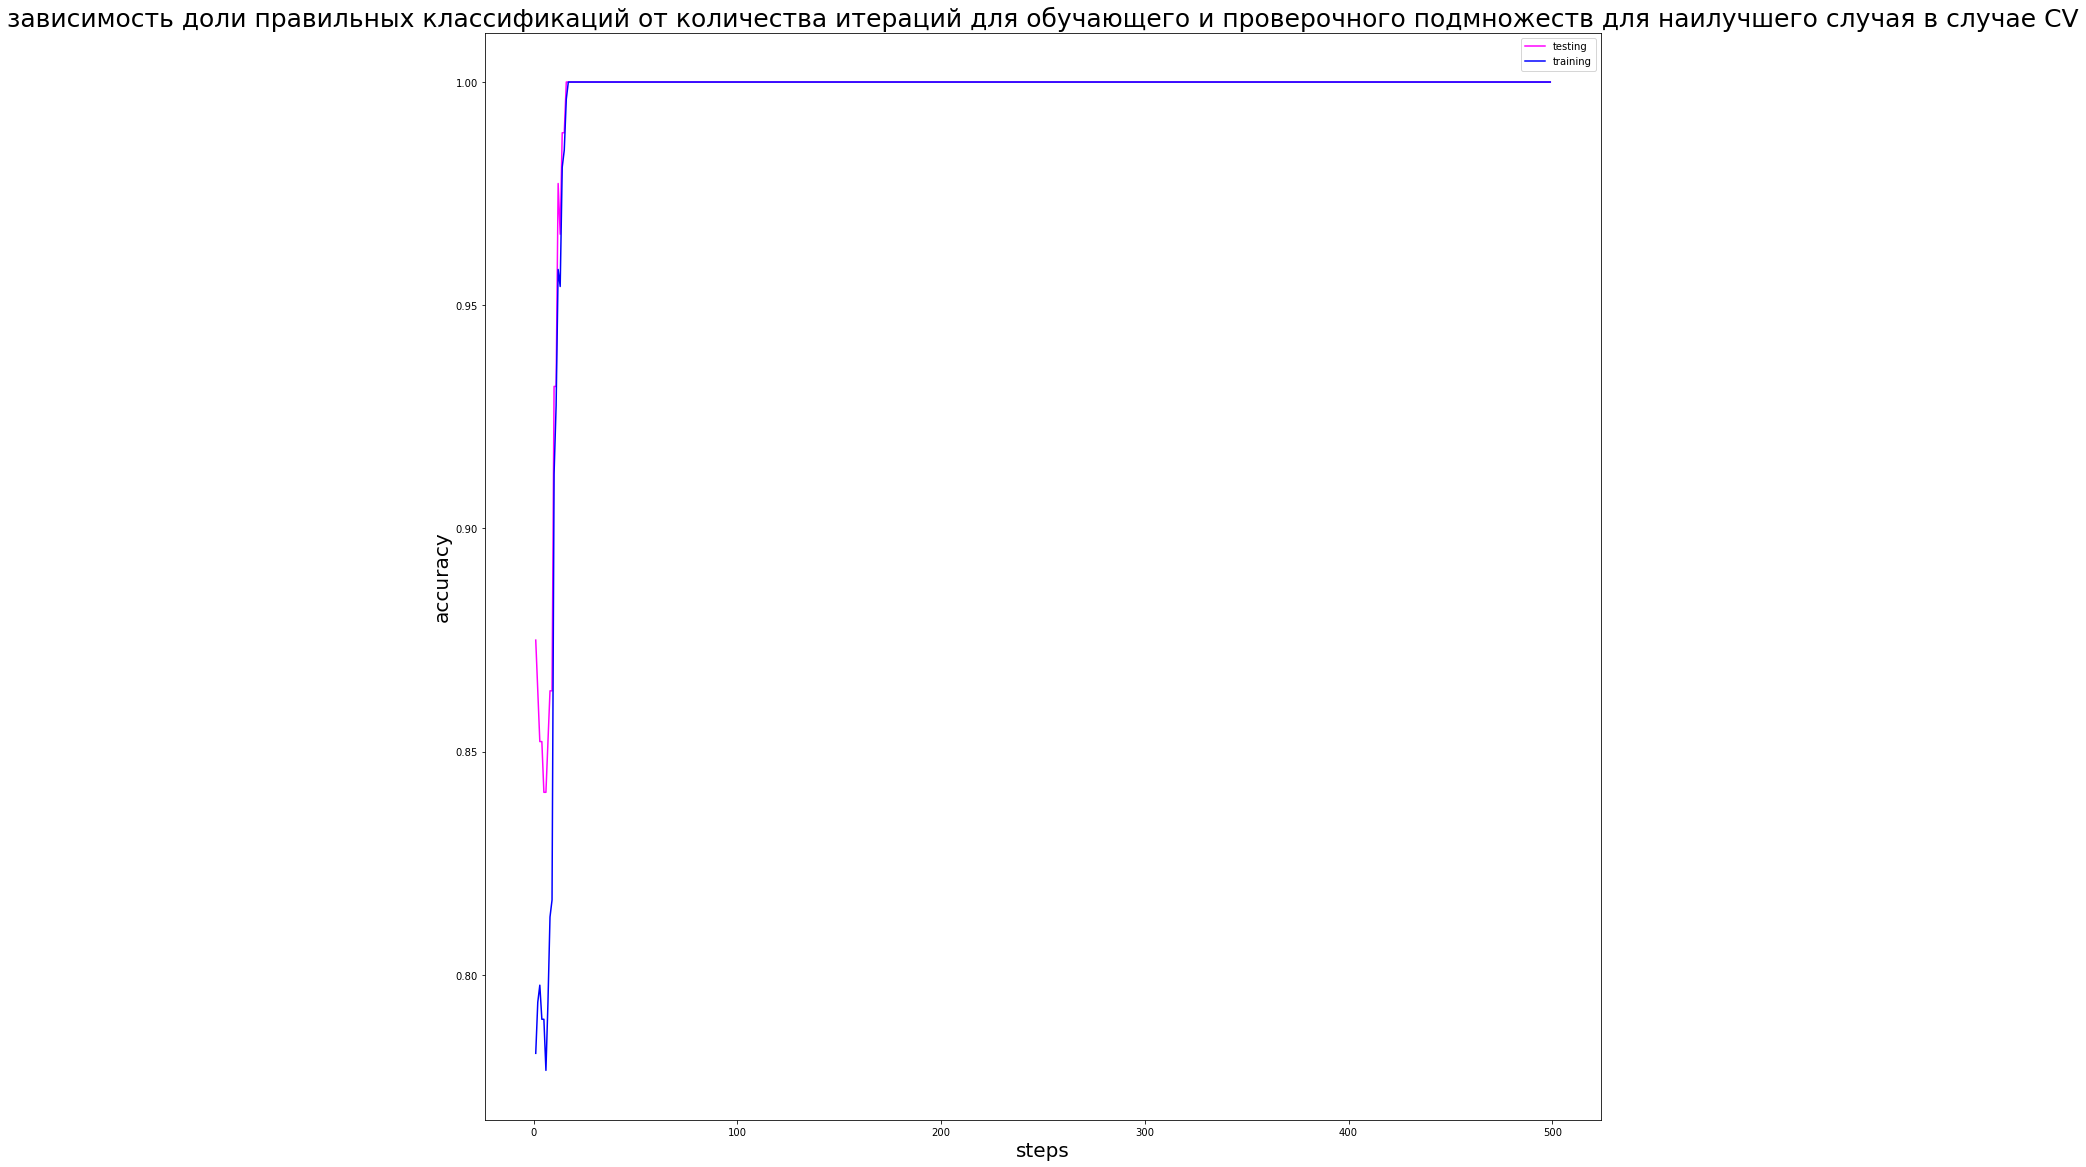

In [508]:
fig,ax = plt.subplots(1, 1, figsize=(20, 20))
ax.plot(range(1, iterations), accuracy_data_it, color = 'magenta', label = 'testing')
ax.plot(range(1, iterations), accuracy_data_tr_it, color = 'blue', label = 'training')
ax.set_xlabel('steps', fontsize=20)
ax.set_ylabel('accuracy', fontsize=20)
ax.set_title('зависимость доли правильных классификаций от количества итераций для обучающего и проверочного подмножеств для наилучшего случая в случае CV', fontsize=25)
ax.legend()

## Заключение:
С возрастанием степени полинома возрастает вероятность переобучения. На высоких степенях полином нестабилен

# Задание 4. Регрессия и регуляризация

Дано множество наблюдений (см. набор данных к заданию), модель - линейная регрессия c L2 регуляризацией. Найти коэффициент регуляризации с минимальной ошибкой на проверочном подмножестве, определить среднеквадратическую ошибку на тестовом подмножестве. Для выбора гиперпараметров использовать кросс-валидацию (параметры см. задание 2). Сделать заключение о влиянии коэффициента регуляризации.

### Коэф. регуляризации
alphas = np.append([0.0], np.logspace(-8, 1, 20, base=10))

Построить:

    матрицу корреляций
    график зависимости среднеквадратической ошибки от коэффициента регуляризации для обучающего и проверочного подмножеств
    график зависимости R-квадрата от коэффициента регуляризации для обучающего и проверочного подмножеств
    график предсказанные значения (y_pred) - действительные значения (y_true) для итоговой модели



In [509]:
url = 'https://raw.githubusercontent.com/MLMethods/Assignments/master/data/A2_Model_Selection/regularization.csv'
res = requests.get(url, allow_redirects=True)
with open('reg_df.csv','wb') as file:
    file.write(res.content)
reg_df = pd.read_csv('reg_df.csv')
reg_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
0,3.856603,14.873388,57.360757,221.217682,853.148822,3290.256492,1.268921e+04,4.893726e+04,1.887316e+05,7.278629e+05,2.807078e+06,1.082579e+07,4.175077e+07,1.610161e+08,6.209754e+08,2.394856e+09,9.209759
1,0.103760,0.010766,0.001117,0.000116,0.000012,0.000001,1.294799e-07,1.343480e-08,1.393992e-09,1.446402e-10,1.500783e-11,1.557209e-12,1.615756e-13,1.676504e-14,1.739537e-15,1.804939e-16,10.409240
2,3.168241,10.037752,31.802020,100.756468,319.220791,1011.368453,3.204259e+03,1.015187e+04,3.216356e+04,1.019019e+05,3.228498e+05,1.022866e+06,3.240687e+06,1.026728e+07,3.252921e+07,1.030604e+08,7.643742
3,3.744019,14.017681,52.482471,196.495391,735.682558,2754.409777,1.031256e+04,3.861044e+04,1.445582e+05,5.412288e+05,2.026371e+06,7.586773e+06,2.840503e+07,1.063490e+08,3.981726e+08,1.490766e+09,8.453341
4,2.492535,6.212731,15.485450,38.598027,96.206935,239.799159,5.977078e+02,1.489808e+03,3.713398e+03,9.255774e+03,2.307034e+04,5.750364e+04,1.433298e+05,3.572546e+05,8.904697e+05,2.219527e+06,9.317824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4.403960,19.394866,85.414221,376.160841,1656.597410,7295.589233,3.212949e+04,1.414970e+05,6.231471e+05,2.744315e+06,1.208585e+07,5.322562e+07,2.344035e+08,1.032304e+09,4.546225e+09,2.002139e+10,9.510032
296,3.004771,9.028649,27.129023,81.516502,244.938425,735.983886,2.211463e+03,6.644940e+03,1.996652e+04,5.999483e+04,1.802707e+05,5.416723e+05,1.627601e+06,4.890569e+06,1.469504e+07,4.415523e+07,8.615320
297,3.226139,10.407971,33.577559,108.325862,349.474260,1127.452444,3.637318e+03,1.173449e+04,3.785710e+04,1.221323e+05,3.940156e+05,1.271149e+06,4.100903e+06,1.323008e+07,4.268208e+07,1.376983e+08,8.320160
298,0.283141,0.080169,0.022699,0.006427,0.001820,0.000515,1.458880e-04,4.130687e-05,1.169567e-05,3.311523e-06,9.376281e-07,2.654810e-07,7.516855e-08,2.128330e-08,6.026175e-09,1.706257e-09,10.217886


In [510]:
X = reg_df.drop('Y', axis=1).values
y = reg_df['Y'].values

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [512]:
alphas = np.append([0.0], np.logspace(-8, 1, 20, base=10))
alphas

array([0.00000000e+00, 1.00000000e-08, 2.97635144e-08, 8.85866790e-08,
       2.63665090e-07, 7.84759970e-07, 2.33572147e-06, 6.95192796e-06,
       2.06913808e-05, 6.15848211e-05, 1.83298071e-04, 5.45559478e-04,
       1.62377674e-03, 4.83293024e-03, 1.43844989e-02, 4.28133240e-02,
       1.27427499e-01, 3.79269019e-01, 1.12883789e+00, 3.35981829e+00,
       1.00000000e+01])

In [513]:
import seaborn as sn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [514]:
covM = reg_df.cov()
covM

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
X1,2.014265e+00,9.810682e+00,4.320531e+01,1.881641e+02,8.234451e+02,3.633286e+03,1.616785e+04,7.251878e+04,3.276224e+05,1.489734e+06,6.813569e+06,3.132738e+07,1.447241e+08,6.714827e+08,3.127797e+09,1.462187e+10,-5.740914e-01
X2,9.810682e+00,5.110754e+01,2.347375e+02,1.052060e+03,4.701302e+03,2.107832e+04,9.499959e+04,4.305857e+05,1.962455e+06,8.990978e+06,4.139246e+07,1.914168e+08,8.888486e+08,4.143048e+09,1.937863e+10,9.093170e+10,-2.148434e+00
X3,4.320531e+01,2.347375e+02,1.109401e+03,5.076602e+03,2.304972e+04,1.046627e+05,4.766522e+05,2.179447e+06,1.000811e+07,4.615333e+07,2.137092e+08,9.933686e+08,4.633979e+09,2.168920e+10,1.018293e+11,4.794468e+11,-6.572758e+00
X4,1.881641e+02,1.052060e+03,5.076602e+03,2.360274e+04,1.085317e+05,4.979720e+05,2.287823e+06,1.053987e+07,4.871781e+07,2.259686e+08,1.051719e+09,4.911176e+09,2.300535e+10,1.080802e+11,5.091576e+11,2.404721e+12,-1.711184e+01
X5,8.234451e+02,4.701302e+03,2.304972e+04,1.085317e+05,5.042822e+05,2.334168e+06,1.080491e+07,5.010547e+07,2.329436e+08,1.086042e+09,5.078086e+09,2.381158e+10,1.119597e+11,5.277861e+11,2.494079e+12,1.181274e+13,-3.014055e+01
X6,3.633286e+03,2.107832e+04,1.046627e+05,4.979720e+05,2.334168e+06,1.088588e+07,5.072316e+07,2.365844e+08,1.105579e+09,5.178330e+09,2.431352e+10,1.144374e+11,5.399102e+11,2.553083e+12,1.209890e+13,5.745260e+13,4.125584e+01
X7,1.616785e+04,9.499959e+04,4.766522e+05,2.287823e+06,1.080491e+07,5.072316e+07,2.377200e+08,1.114512e+09,5.232319e+09,2.460934e+10,1.159821e+11,5.477621e+11,2.592348e+12,1.229322e+13,5.840766e+13,2.780112e+14,8.700562e+02
X8,7.251878e+04,4.305857e+05,2.179447e+06,1.053987e+07,5.010547e+07,2.365844e+08,1.114512e+09,5.249405e+09,2.474719e+10,1.168328e+11,5.525063e+11,2.617496e+12,1.242271e+13,5.906247e+13,2.812835e+14,1.341776e+15,6.646181e+03
X9,3.276224e+05,1.962455e+06,1.000811e+07,4.871781e+07,2.329436e+08,1.105579e+09,5.232319e+09,2.474719e+10,1.171049e+11,5.547478e+11,2.631575e+12,1.250240e+13,5.949033e+13,2.835109e+14,1.353148e+15,6.467667e+15,4.114909e+04
X10,1.489734e+06,8.990978e+06,4.615333e+07,2.259686e+08,1.086042e+09,5.178330e+09,2.460934e+10,1.168328e+11,5.547478e+11,2.636113e+12,1.254044e+13,5.973284e+13,2.849009e+14,1.360692e+15,6.507309e+15,3.116024e+16,2.327933e+05


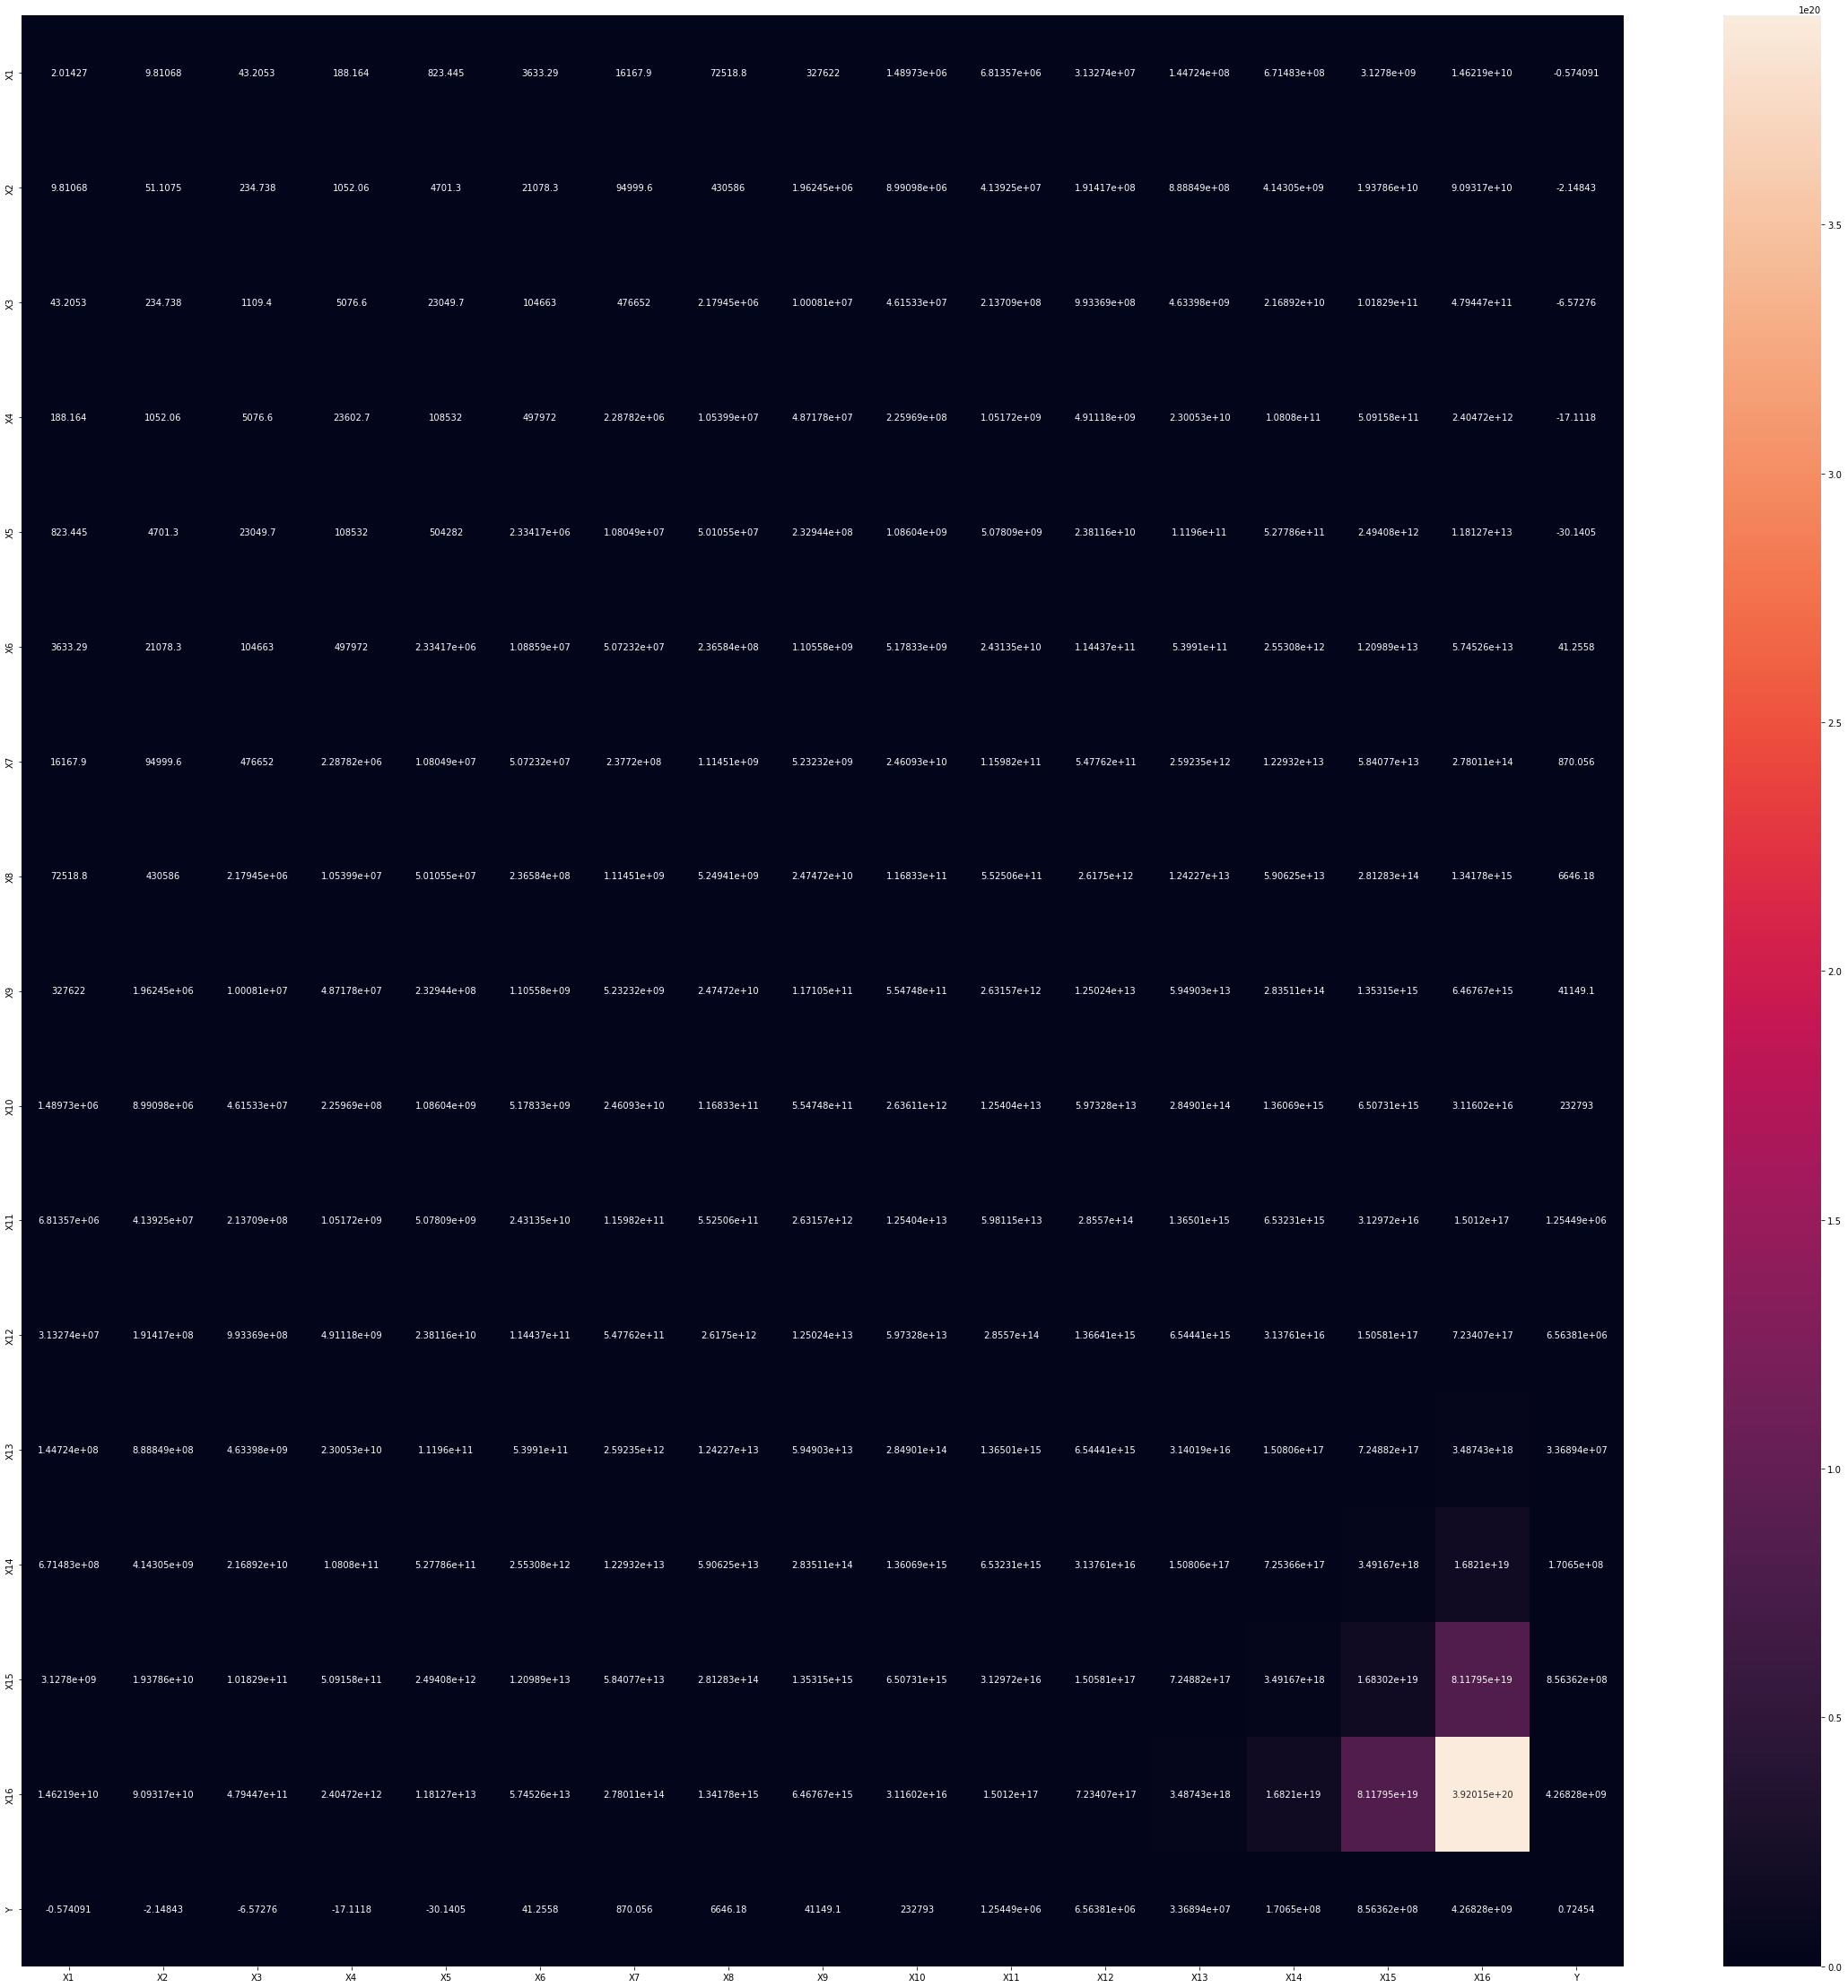

In [515]:
plt.figure(figsize = (40, 40))
sn.heatmap(covM, annot=True, fmt='g')
plt.show()

In [522]:
# L2 regularization
l2 = Ridge()

In [529]:
X_train_init, X_test, y_train_init, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(X_train_init, y_train_init, train_size=0.75, random_state=0)

In [537]:
alpha = {
    "alpha": alphas
}

grid_class_parameters = {
    "estimator": lr,
    "param_grid": alpha,
    "cv": KFold(n_splits = 4, shuffle=True, random_state=0),
    "scoring": ['neg_mean_squared_error','r2'],
    "return_train_score": True
}

l2cv = GridSearchCV(l2, alpha, cv = 4, scoring=['neg_mean_squared_error','r2'], 
                           refit='neg_mean_squared_error', return_train_score = True)
l2cv.fit(x_train, y_train) 

y_train_pred = l2cv.predict(X_train_init)
y_test_pred = l2cv.predict(X_test)
Y_test = l2cv.predict(x_val)

# training mse and r2
mse_tr = mean_squared_error(y_train_init, y_train_pred) 
r2_tr = r2_score(y_train_init, y_train_pred)

# val mse and r2
mse_trv = mean_squared_error(Y_test, y_val) 
r2_trv = r2_score(Y_test, y_val)

# testing mse and r2
mse_trt = mean_squared_error(y_test, y_test_pred) 
r2_trt = r2_score(y_test, y_test_pred)

C:\Users\blueb\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.73158e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.81005e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.59785e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.3671e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00517e-24): result may not be accurate.

In [535]:
mse_tr, r2_tr

(0.2312283654423648, 0.6703461783977429)

l2.fit(x_train, y_train)

y_train_pred = l2.predict(X_train_init)
y_test_pred = l2.predict(X_test)
y_test_holdout_pred = l2.predict(x_val)

In [563]:
l2cv.best_params_

{'alpha': 3.359818286283774}

In [547]:
mse_tr_test = np.array([abs(l2cv.cv_results_["mean_test_neg_mean_squared_error"]),
                        abs(l2cv.cv_results_["mean_train_neg_mean_squared_error"])
                       ])
columns = ["abs test mse", "abs train mse"]

In [570]:
r2_tr_test = np.array([abs(l2cv.cv_results_["mean_test_r2"]),
                       abs(l2cv.cv_results_["mean_train_r2"])
                      ])
columnsr = ["r2 test mse", "r2 train mse"]

In [560]:
df_mse = pd.DataFrame(mse_tr_test, index = columns)
df_mse = df_mse.T
df_mse

,abs test mse,abs train mse
0,0.307453,0.208261
1,0.286323,0.212123
2,0.285664,0.212329
3,0.284913,0.212528
4,0.284333,0.212698
5,0.283883,0.212821
6,0.283530,0.212986
7,0.283327,0.213215
8,0.283091,0.213398
9,0.282595,0.213521


In [561]:
df_mse["abs test mse"]

0     0.307453
1     0.286323
2     0.285664
3     0.284913
4     0.284333
5     0.283883
6     0.283530
7     0.283327
8     0.283091
9     0.282595
10    0.281817
11    0.280761
12    0.306491
13    0.279934
14    0.276804
15    0.276859
16    0.277487
17    0.272522
18    0.273225
19    0.265377
20    0.556281
Name: abs test mse, dtype: float64

In [571]:
df_r2 = pd.DataFrame(r2_tr_test, index = columnsr)
df_r2 = df_r2.T
df_r2

,r2 test mse,r2 train mse
0,0.553066,0.698291
1,0.576759,0.692413
2,0.577809,0.692110
3,0.579014,0.691822
4,0.579901,0.691579
5,0.580505,0.691400
6,0.580916,0.691155
7,0.581135,0.690815
8,0.581482,0.690543
9,0.582297,0.690363


In [554]:
# график зависимости среднеквадратической ошибки от коэффициента регуляризации для обучающего и проверочного подмножеств
alphas_x = np.asarray(alphas, dtype = "float")
alphas_x

array([0.00000000e+00, 1.00000000e-08, 2.97635144e-08, 8.85866790e-08,
       2.63665090e-07, 7.84759970e-07, 2.33572147e-06, 6.95192796e-06,
       2.06913808e-05, 6.15848211e-05, 1.83298071e-04, 5.45559478e-04,
       1.62377674e-03, 4.83293024e-03, 1.43844989e-02, 4.28133240e-02,
       1.27427499e-01, 3.79269019e-01, 1.12883789e+00, 3.35981829e+00,
       1.00000000e+01])

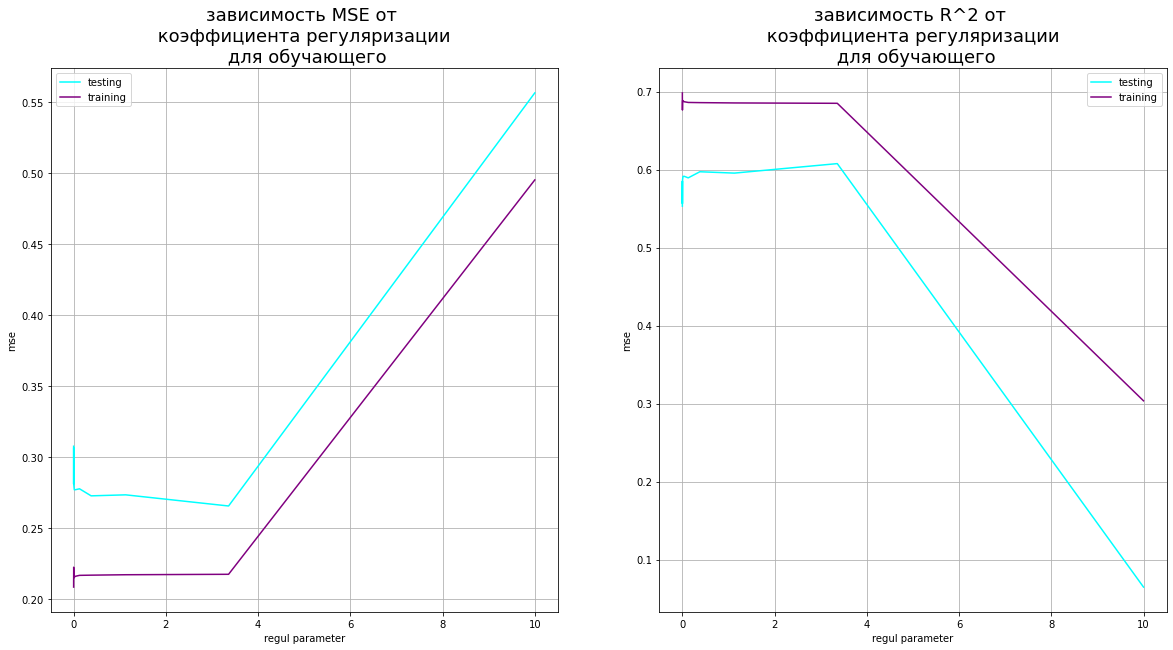

In [582]:
fig,ax = plt.subplots(1, 2, figsize = (20, 10))

ax[0].plot(alphas, df_mse["abs test mse"], color = 'cyan', label = "testing")
ax[0].plot(alphas, df_mse["abs train mse"], color = 'purple', label = "training")
ax[0].set_xlabel('regul parameter', fontsize = 10)
ax[0].set_ylabel('mse', fontsize = 10)
ax[0].set_title('зависимость MSE от \n коэффициента регуляризации \n для обучающего',fontsize = 18)
ax[0].grid(True)
ax[0].legend()

ax[1].plot(alphas, df_r2["r2 test mse"], color = 'cyan', label = "testing")
ax[1].plot(alphas, df_r2["r2 train mse"], color = 'purple', label = "training")
ax[1].set_xlabel('regul parameter', fontsize = 10)
ax[1].set_ylabel('mse', fontsize = 10)
ax[1].set_title('зависимость R^2 от \n коэффициента регуляризации \n для обучающего',fontsize = 18)
ax[1].grid(True)
ax[1].legend()

In [ ]:
# график предсказанные значения (y_pred) - действительные значения (y_true) для итоговой модели

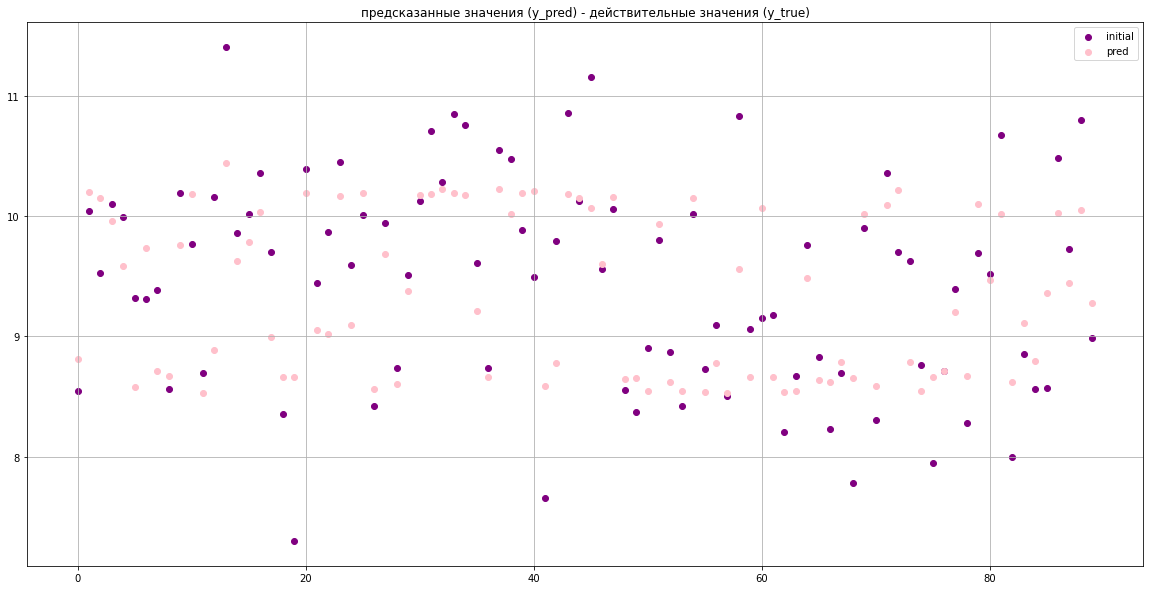

In [585]:
plt.figure(figsize = (20, 10))
plt.scatter(range(len(y_test)), y_test, color = 'purple', label = "initial")
plt.scatter(range(len(y_test_pred)), y_test_pred, color = 'pink', label = "pred")
plt.title('предсказанные значения (y_pred) - действительные значения (y_true)')
plt.grid(True)
plt.legend()

## Заключение
Регуляризация ничего не может с выбросами: с ростом коэффициента регуляризации решение отклоняется по количеству выбросов 